In [11]:
from main import *

In [12]:
train_df_original = pd.read_csv('../data/train.csv')
train_df = train_df_original.copy()
test_df_original = pd.read_csv('../data/test.csv')
test_df = test_df_original.copy()

Limpiamos los datos que molestan y agregamos los features engenieres que vamos a usar

In [13]:
drops(train_df)
train_df = feats.newfeats(train_df)

In [15]:
def print_scores_por_segmento(model):
    scores = np.array(model.scores_por_segmento())
    df_scores = pd.DataFrame()
    i = 0
    for metric in model.metrics():
        df_scores[metric.__name__] = scores[:, i]
        i += 1
    return df_scores

In [16]:
def print_scores_promedio(model):
    df_prom_scores = pd.DataFrame()
    prom_scores = np.array(model.prom_scores())
    i = 0
    for metric in model.metrics():
        df_prom_scores[metric.__name__] = [prom_scores[i]]
        i += 1

    return df_prom_scores

# <span style="color:green"> Predicción de Precios</span>

Intentaremos predecir el precio de un inmueble en función de algúnas de las demás características.

Vamos a armar un modelo basandonos en la información que conocemos del set de datos a utilizar. Sabemos que existe cierta correlación entre el precio de una casa y algunas de las características, por lo tanto podemos hacer que nuestro algoritmo explote esta propiedad utilizandolas como variables. Nuestro algoritmo entonces, será entrenado utilizando como features:
- Cantidad de metros cubiertos
- Cantidad de metros totales



¿Sería correcto suponer que esta correlación se cumple de manera indistinguida en todo Mexico (o más en general, en cualquier país)?
Mencionamos previamente el uso de las variables categoricas para generar segmentos que, partan nuestra función con el fin de generalizar mucho mejor al algoritmo. Si bien no es obvio que datos podría uno utilizar para armar estos segmentos, hay una intuición de por donde empezar.


Una idea no demasiado erronea quizas sería pensar que mas allá de los metros o antiguedad que tenga una casa, siempre habrá ciudades que tengan casas más caras que otras. Esto puede deberse a muchos factores quizas no tan tangibles, como que tan lejos está de EEUU (en este caso), o que tan cerca esta de la capital del país, de la costa o del aeropuerto, o simplemente atiende a razones historicas.

Si volvemos al analisis de correlación de los datos, podemos ver que existe una correlación bastante buena entre los **centros comerciales cercanos** y las **escuelas cercanas**, es decir que si hay un centro comercial cercano es muy probable que también haya una escuela. Esto nos da la idea de que podemos separar a las casas en 2 conjuntos, llamaremos **casas urbanas** a aquellas casas que cumplan con estas dos condiciones, dandonos una idea de que aquella casa que cumpla con estas dos características estará en los suburbios, más alejadad de las zonas rurales. Para hacer esto, agregaremos una nueva columna al data set que sea la conjunción de estas dos columnas.

Además de esto, agregamos un feature llamado **mejor ciudad**, el cual compara las ciudades según un ranking.

## Modelo con NLP

In [90]:
segments = ['provincia', 'urbana']
features = ['metroscubiertos', 'metrostotales', 'mejorciudad']
predict_column = 'precio'
text_features = ['titulo', 'descripcion']
carititud_column = 'carititud'

In [ ]:
nlpModel = NlpModel(train_df, text_features=text_features, features=features, segment_columns=segments)
segments_ret = nlpModel.regresionar()

In [62]:
print_scores_por_segmento(nlpModel)

,mean_squared_error,mean_squared_log_error,r2_score,max_error,NRMSE,mean_absolute_error,porcentajeProm
0,1906787483805.516,0.169,0.659,7088967.065,546918.786,1020670.278,39.292
1,2049779213072.175,0.226,0.631,7382238.698,615463.169,1087612.177,49.271
2,2026625145910.849,0.530,0.455,5604139.374,860683.713,1234926.700,99.548
3,2806369052575.303,0.664,0.264,5384929.103,1180328.507,1499252.124,119.844
4,336334591376.133,0.123,0.692,1579733.437,212173.750,417931.872,32.106
...,...,...,...,...,...,...,...
59,363883032411.435,0.365,0.009,1634235.463,418279.971,510242.742,77.643
60,4031487284595.046,0.810,-8.860,2927656.332,2493760.188,1491997.693,140.173
61,1205135208096.904,0.658,-0.002,2300350.636,835051.168,902726.811,121.165
62,747054560629.418,0.526,-6.383,1547489.626,985231.068,625041.147,98.864


In [61]:
print_scores_promedio(nlpModel)

,mean_squared_error,mean_squared_log_error,r2_score,max_error,NRMSE,mean_absolute_error,porcentajeProm
0,1386230053051.330,0.424,-0.223,2787214.118,772618.353,838608.382,81.758


# Modelo **SIN** NLP mismos features

In [ ]:
model1 = Model(train_df, features=features, segment_columns=segments)
segments_ret = model1.regresionar()

In [89]:
print_scores_por_segmento(model1)

,mean_squared_error,mean_squared_log_error,r2_score,max_error,NRMSE,mean_absolute_error,porcentajeProm
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1643876377741.922,0.253,0.251,8131793.401,761624.189,838573.816,39.705
2,8999560970331.432,0.663,-0.889,7554097.253,1855327.004,2112078.944,39.320
3,974368108418.113,0.229,0.417,4812955.301,610795.889,633552.270,46.523
4,1674763560838.958,0.283,0.240,8007857.435,835000.077,836753.569,44.758
...,...,...,...,...,...,...,...
233,41918287699.598,0.172,0.037,179802.394,59915.689,120674.580,19.566
234,58859536095.994,0.093,-116.066,152754.084,117133.405,83622.805,17.292
235,11879694278581.777,2.614,nan,2940367.485,16740818.711,2940367.485,442.999
236,1962145817990.361,1.329,-65.668,1581070.778,3143915.609,1243316.338,212.562


In [58]:
print_scores_promedio(model1)

,mean_squared_error,mean_squared_log_error,r2_score,max_error,NRMSE,mean_absolute_error,porcentajeProm
0,1166954971977.436,0.425,-0.354,2690964.818,738599.745,752262.629,79.439


In [98]:
order_df = train_df.copy()[:100]

In [99]:
order_df = order_df.sort_values('precio')
order_df = order_df[features + segments + [predict_column] + text_features].dropna()
reales = order_df['precio']
pred_nlp = nlpModel.predict(order_df)
pred_common = model1.predict(order_df)

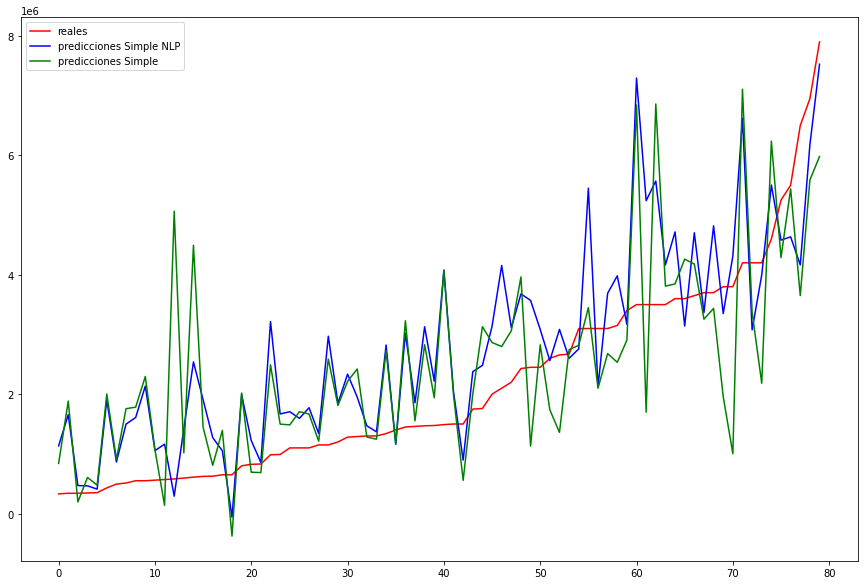

In [100]:

X = reales# np.sort(reales)
Y = pred_nlp #np.sort(predMod)
Z = pred_common
#print(Y)

plt.figure(figsize=(15,10))

plt.plot(np.arange(len(X)), X, color='red', label = 'reales')
plt.plot(np.arange(len(X)), Y, color='blue', label = 'predicciones Simple NLP')
plt.plot(np.arange(len(X)), Z, color='green', label = 'predicciones Simple')
plt.legend()

# plt.fill_between(np.arange(np.size(X)), X, Y, X>Y, color='pink')
# plt.fill_between(np.arange(np.size(X)), X, Y, X<Y, color='pink')
# plt.fill_between(np.arange(np.size(X)), X, Z, X<Z, color='lightblue')
# plt.fill_between(np.arange(np.size(X)), X, Z, X>Z, color='lightblue')
plt.show()